<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Python_220809_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%8001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression을 활용한 데이터 분류 실습**
---
> 성인 남녀의 키/몸무게 데이터로 선형회귀 분석하기

#### **라이브러리 import**


In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

####**데이터 로드 및 확인**

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
filename = '/gdrive/My Drive/k-means.csv'
df = pd.read_csv(filename)
df = df.loc[:499]              # 데이터 일부만 추출
df.head()

,height,weight
0,1736.0,72.1
1,1833.0,106.2
2,1744.0,69.1
3,1751.0,68.4
4,1851.0,81.9


In [4]:
df.shape

(500, 2)

####**선형 회귀 모델 만들기**

In [5]:
X = df['height']
Y = df['weight']

In [6]:
lr = LinearRegression()
# reshape(-1, 1) X에 들어있는 value 값들이 각각 하나씩 들어간 컬럼으로 만들어짐. 만일 reshape(-1, 4)라면 값이 네 개씩 들어간 하나의 컬럼 생성
lr.fit(X.values.reshape(-1, 1), Y)

LinearRegression()

In [7]:
print(lr.coef_)                           # weight 가중치
print(lr.intercept_)                      # bias 절편

[0.06399677]
-43.156493335409536


#### **모델 시각화하기**

matplot으로 시각화

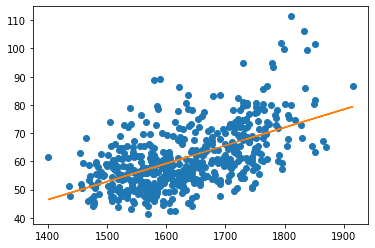

In [8]:
plt.plot(X, Y, 'o')                                       # 'o' 점 형태로 표현
plt.plot(X, lr.predict(X.values.reshape(-1,1)))           # x 값과 예측값을 직선으로 표현 (회귀 직선)
plt.show()

seaborn의 lmplot으로 시각화

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


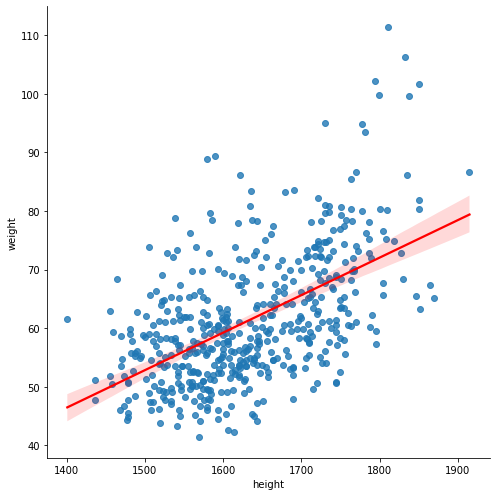

In [9]:
df['height'] = df['height'].astype(float)
df['weight'] = df['weight'].astype(float)

sns.lmplot(x = 'height', y = 'weight', data = df, size = 7, line_kws={"color":"red"}) # 따로 설정하지 않아도 default 값이 회귀직선을 보여줌